# Considered models

Let's look at the popular classification models: 
- **K-Nearest Neighbors (KNN) Classification**
- **DecisionTreeClassifier**
- **LogRegression**
- **LinearSVC**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [3]:
data_clients = pd.read_csv('prepared_data.csv')
data_clients.head()

,pre_since_opened,pre_since_confirmed,pre_pterm,pre_fterm,pre_till_pclose,pre_till_fclose,pre_loans_credit_limit,pre_loans_credit_cost_rate,pre_util,enc_paym_5,...,enc_paym_7,enc_paym_8,enc_paym_9,enc_paym_10,enc_paym_11,enc_paym_12,enc_paym_13,enc_paym_14,enc_loans_credit_status,flag
0,8.100000,7.600000,7.100000,7.500000,11.400000,10.700000,9.600000,8.0,16.0,0.0,...,0.0,1.5,1.5,1.5,2.5,3.0,3.0,3.0,3.0,0
1,11.428571,7.642857,6.642857,7.928571,10.071429,7.000000,8.142857,4.0,16.0,0.0,...,2.5,1.5,1.0,0.0,2.5,3.0,3.0,3.0,3.0,0
2,8.333333,10.666667,7.000000,6.000000,5.000000,9.000000,2.000000,4.0,6.0,0.0,...,0.0,0.0,0.0,3.0,4.0,3.0,3.0,3.0,2.0,0
3,7.000000,7.333333,7.600000,7.800000,5.200000,8.133333,9.866667,4.0,16.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,0
4,12.000000,9.000000,4.000000,8.000000,1.000000,11.000000,12.000000,0.0,16.0,1.0,...,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,2.0,0


## Using StandardScaler or not

*The data spread is not too large, so it is unclear whether the data needs **to be scaled**, but we will try two ways.*
*Second problem - **unbalanced data**, we should try different methods to deal with it.* *Third problem - **dataset size**, let's try different sizes.*

In [4]:
data_clients.shape

(3000000, 21)

In [5]:
3000000*0.09

270000.0

In [6]:
data_clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 21 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   pre_since_opened            float64
 1   pre_since_confirmed         float64
 2   pre_pterm                   float64
 3   pre_fterm                   float64
 4   pre_till_pclose             float64
 5   pre_till_fclose             float64
 6   pre_loans_credit_limit      float64
 7   pre_loans_credit_cost_rate  float64
 8   pre_util                    float64
 9   enc_paym_5                  float64
 10  enc_paym_6                  float64
 11  enc_paym_7                  float64
 12  enc_paym_8                  float64
 13  enc_paym_9                  float64
 14  enc_paym_10                 float64
 15  enc_paym_11                 float64
 16  enc_paym_12                 float64
 17  enc_paym_13                 float64
 18  enc_paym_14                 float64
 19  enc_loans_credit_stat

In [7]:
features_type_change = data_clients.columns

In [8]:
for i in range(len(features_type_change)):
    data_clients[features_type_change[i]] = data_clients[features_type_change[i]].astype('int')

## *K-Nearest Neighbors (KNN) Classification*

In [40]:
fractions = [.015, .025, .04]

oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.5)
os= SMOTE()

balanced_methods = [oversample, undersample, os]
accuracy_scaled =[]
accuracy_not_scaled=[]
accuracy=[]

for i in range(len(fractions)):
    print(fractions[i])
    sample_prepared = data_clients.sample(frac =fractions[i]) 
    features= sample_prepared.columns.tolist()[:-1]
    target=['flag']
    
    for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(sample_prepared[features], sample_prepared[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        
        scaler= StandardScaler()
        scaler.fit(X_train)
        X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
        X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
        knn_1=KNeighborsClassifier(n_neighbors=4)
        knn_1.fit(X_train,y_train)
        knn_2=KNeighborsClassifier(n_neighbors=4)
        knn_2.fit(X_train_scaled,y_train)
        pred_test_1 = knn_1.predict(X_test)
        pred_test_2 = knn_2.predict(X_test_scaled)
        accuracy.append([fractions[i], balanced_methods[l],'not_scaled: ', roc_auc_score(y_test, pred_test_1), 'scaled: ', roc_auc_score(y_test, pred_test_2)])
            

0.015


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

0.025


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

0.04


/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [41]:
accuracy

[[0.015,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.9528406008679559,
  'scaled: ',
  0.9592745495351757],
 [0.015,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5058362675620398,
  'scaled: ',
  0.5231271697197503],
 [0.015,
  SMOTE(),
  'not_scaled: ',
  0.9034404602708566,
  'scaled: ',
  0.9035023547972515],
 [0.025,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.9547378525216457,
  'scaled: ',
  0.9594435485419186],
 [0.025,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5076374041915732,
  'scaled: ',
  0.5131059383044636],
 [0.025,
  SMOTE(),
  'not_scaled: ',
  0.9051054203442737,
  'scaled: ',
  0.899335992225017],
 [0.04,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.9511287673254412,
  'scaled: ',
  0.9574962915020762],
 [0.04,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.522688436329588,
  'scaled: ',
  0.5236579275905118],
 [0.04,
  SMOTE(),
  'not_s

## *DecisionTreeClassifier*

In [33]:
fractions = [.025, .05, .07]

oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.5)
os= SMOTE()

balanced_methods = [oversample, undersample, os]
accuracy_scaled =[]
accuracy_not_scaled=[]
accuracy=[]

for i in range(len(fractions)):
    print(fractions[i])
    sample_prepared = data_clients.sample(frac =fractions[i]) 
    features= sample_prepared.columns.tolist()[:-1]
    target=['flag']
    
    for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(sample_prepared[features], sample_prepared[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        
        scaler= StandardScaler()
        scaler.fit(X_train)
        X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
        X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
        tree_1=DecisionTreeClassifier()
        tree_1.fit(X_train,y_train)
        tree_2=DecisionTreeClassifier()
        tree_2.fit(X_train_scaled,y_train)
        pred_test_1 = tree_1.predict(X_test)
        pred_test_2 = tree_2.predict(X_test_scaled)
        accuracy.append([fractions[i], balanced_methods[l],'not_scaled: ', roc_auc_score(y_test, pred_test_1), 'scaled: ', roc_auc_score(y_test, pred_test_2)])
            

0.025
0.05
0.07


In [34]:
accuracy

[[0.025,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.974723917964195,
  'scaled: ',
  0.974209479388161],
 [0.025,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5309754818408287,
  'scaled: ',
  0.5400350363474791],
 [0.025,
  SMOTE(),
  'not_scaled: ',
  0.9034331692940094,
  'scaled: ',
  0.9040903648978149],
 [0.05,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.9731320990656153,
  'scaled: ',
  0.9732189377887387],
 [0.05,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5318685514452572,
  'scaled: ',
  0.5347693551166334],
 [0.05,
  SMOTE(),
  'not_scaled: ',
  0.9064876578175179,
  'scaled: ',
  0.9057949923299337],
 [0.07,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.9732229401816097,
  'scaled: ',
  0.9736043941364259],
 [0.07,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5333214765164911,
  'scaled: ',
  0.5308186345532425],
 [0.07,
  SMOTE(),
  'not_scal

## *LogRegression*

In [35]:
fractions = [.025, .05, .07]

oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.5)
os= SMOTE()

balanced_methods = [oversample, undersample, os]
accuracy_scaled =[]
accuracy_not_scaled=[]
accuracy=[]

for i in range(len(fractions)):
    print(fractions[i])
    sample_prepared = data_clients.sample(frac =fractions[i]) 
    features= sample_prepared.columns.tolist()[:-1]
    target=['flag']
    
    for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(sample_prepared[features], sample_prepared[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        
        scaler= StandardScaler()
        scaler.fit(X_train)
        X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
        X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
        logreg_1=LogisticRegression()
        logreg_1.fit(X_train,y_train)
        logreg_2=LogisticRegression()
        logreg_2.fit(X_train_scaled,y_train)
        pred_test_1 = logreg_1.predict(X_test)
        pred_test_2 = logreg_2.predict(X_test_scaled)
        accuracy.append([fractions[i], balanced_methods[l],'not_scaled: ', roc_auc_score(y_test, pred_test_1), 'scaled: ', roc_auc_score(y_test, pred_test_2)])
            

0.025


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

0.05


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

0.07


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [36]:
accuracy

[[0.025,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.530056557519137,
  'scaled: ',
  0.5318518833272412],
 [0.025,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5320430107526882,
  'scaled: ',
  0.5335176651305683],
 [0.025,
  SMOTE(),
  'not_scaled: ',
  0.6240580044058157,
  'scaled: ',
  0.6239911616946742],
 [0.05,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5280802096680115,
  'scaled: ',
  0.529554868414773],
 [0.05,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5367955286446204,
  'scaled: ',
  0.5352170987941831],
 [0.05,
  SMOTE(),
  'not_scaled: ',
  0.6223339875753495,
  'scaled: ',
  0.6221444213675088],
 [0.07,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5242602052324618,
  'scaled: ',
  0.5233894015532431],
 [0.07,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5224477747399742,
  'scaled: ',
  0.5214301356626337],
 [0.07,
  SMOTE(),
  'not_scal

## *LinearSVC*

In [38]:
fractions = [.025, .05, .07]

oversample = RandomOverSampler(sampling_strategy=0.5)
undersample = RandomUnderSampler(sampling_strategy=0.5)
os= SMOTE()

balanced_methods = [oversample, undersample, os]
accuracy_scaled =[]
accuracy_not_scaled=[]
accuracy=[]

for i in range(len(fractions)):
    print(fractions[i])
    sample_prepared = data_clients.sample(frac =fractions[i]) 
    features= sample_prepared.columns.tolist()[:-1]
    target=['flag']
    
    for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(sample_prepared[features], sample_prepared[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        
        scaler= StandardScaler()
        scaler.fit(X_train)
        X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
        X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
    
        tree_1=LinearSVC()
        tree_1.fit(X_train,y_train)
        tree_2=LinearSVC()
        tree_2.fit(X_train_scaled,y_train)
        pred_test_1 = tree_1.predict(X_test)
        pred_test_2 = tree_2.predict(X_test_scaled)
        accuracy.append([fractions[i], balanced_methods[l],'not_scaled: ', roc_auc_score(y_test, pred_test_1), 'scaled: ', roc_auc_score(y_test, pred_test_2)])
            

0.025


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y w

0.05


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y w

0.07


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y w

In [39]:
accuracy

[[0.025,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5115191007922942,
  'scaled: ',
  0.5255939081114889],
 [0.025,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5097461530587873,
  'scaled: ',
  0.5239423044116142],
 [0.025,
  SMOTE(),
  'not_scaled: ',
  0.5045140341715431,
  'scaled: ',
  0.6249702878604773],
 [0.05,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.50064134207467,
  'scaled: ',
  0.5255763869634296],
 [0.05,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5,
  'scaled: ',
  0.5160710708342381],
 [0.05,
  SMOTE(),
  'not_scaled: ',
  0.5744187124383582,
  'scaled: ',
  0.6185395983940044],
 [0.07,
  RandomOverSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5012830747551803,
  'scaled: ',
  0.5252974586096765],
 [0.07,
  RandomUnderSampler(sampling_strategy=0.5),
  'not_scaled: ',
  0.5169423342642095,
  'scaled: ',
  0.5238338622549487],
 [0.07,
  SMOTE(),
  'not_scaled: ',
  0.5885

## Temp Conclusion
- *In the case of knn, scaled data was better trained, as for the sample size, it is better not to take too large size.  I'll leave 0.04 of the entire sample and SMOTE() method for further tuning of model.*
- *In the case of DecisionTreeClassifier, scaled data was better trained, as for the sample size, it is better not to take too large.  I'll leave 0.05 of the entire sample and RandomUnderSampler() method for further tuning of model.*
- *In the case of LogRegression, not scaled data was better trained, as for the sample size, it is better not to take too large.  I'll leave 0.025 of the entire sample and SMOTE() method for further tuning of model.*
- *In the case of LinearSVC, scaled data was better trained, as for the sample size, it is better not to take too large.  I'll leave 0.025 of the entire sample and SMOTE() method for further tuning of model.*

## Selection of hyperparameters to increase the speed

### *KNN*

In [9]:
knn_sample = data_clients.sample(frac = 0.04) 

In [10]:
features= knn_sample.columns.tolist()[:-1]
target=['flag']

In [11]:
os = SMOTE(sampling_strategy=0.5)
X_resampled, y_resampled = os.fit_resample(knn_sample[features], knn_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [12]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [15]:
scores_ = cross_val_score(knn, X_test_scaled, y_test, cv=5, scoring='roc_auc')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [16]:
scores_.mean() 
#для таблички

0.8640502412128941

In [13]:
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='roc_auc')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [14]:
scores.mean()

0.9513029104588531

In [134]:
#Let's look at the different number of neighbors

In [135]:
score_list = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights ='distance')
    knn.fit(X_train_scaled,y_train)
    pred_test = knn.predict(X_test_scaled)
    score_list.append([k, roc_auc_score(y_test, pred_test)])

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n

In [136]:
score_df = pd.DataFrame(score_list, columns = ['k', 'roc_auc_score'])

In [137]:
score_df

,k,roc_auc_score
0,1,0.922175
1,3,0.906949
2,5,0.898316
3,7,0.893396
4,9,0.891106
5,11,0.889314
6,13,0.888297
7,15,0.887539
8,17,0.885656
9,19,0.884053


In [138]:
knn = KNeighborsClassifier(n_neighbors=3, weights ='distance')
knn.fit(X_train_scaled,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [139]:
pred_train = knn.predict(X_train_scaled)
pred_test = knn.predict(X_test_scaled)

In [140]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(mse_train, mse_test)

0.001281497480201584 0.1166882649388049



Unfortunately, there is retraining here.



## *DecisionTreeClassifier*

In [17]:
dtc_sample = data_clients.sample(frac = 0.05) 

In [18]:
features= dtc_sample.columns.tolist()[:-1]
target=['flag']

In [19]:
under = RandomUnderSampler(sampling_strategy=0.8)
X_resampled, y_resampled = under.fit_resample(dtc_sample[features], dtc_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [20]:
tree =DecisionTreeClassifier()

In [21]:
scores_ = cross_val_score(tree, X_test_scaled, y_test, cv=5, scoring='roc_auc')
scores = cross_val_score(tree, X_train_scaled, y_train, cv=5, scoring='roc_auc')

In [22]:
scores_.mean()

0.5194259188087325

In [23]:
scores.mean()

0.5318148804200057

In [116]:
param_grid={'min_samples_leaf' : [4, 10, 15],
            'max_depth' : [5, 15, 20], 
            'max_leaf_nodes':[100, 200, 300, 500]
    }

In [117]:
tree =RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = param_grid, scoring='roc_auc', cv = 5, n_iter=10)

In [118]:
tree_grid = tree.fit(X_train_scaled,y_train)

In [119]:
tree_grid.best_params_

{'min_samples_leaf': 4, 'max_leaf_nodes': 100, 'max_depth': 5}

In [120]:
tree=DecisionTreeClassifier(min_samples_leaf = 4, max_leaf_nodes= 100, max_depth=5)
tree.fit(X_train_scaled,y_train)
pred_test = tree.predict(X_test_scaled)
roc_auc_score(y_test, pred_test)

0.5900412427600358

In [121]:
pred_train = tree.predict(X_train_scaled)
pred_test = tree.predict(X_test_scaled)

In [122]:
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(mse_train, mse_test)

0.3855028075548749 0.384238464679461


## *LogRegression*

In [24]:
logreg_sample = data_clients.sample(frac = 0.025) 

In [25]:
features= logreg_sample.columns.tolist()[:-1]
target=['flag']

In [26]:
os = SMOTE(sampling_strategy=0.6)
X_resampled, y_resampled = os.fit_resample(logreg_sample[features], logreg_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    

In [27]:
logreg=LogisticRegression()

In [28]:
scores_ = cross_val_score(logreg, X_test, y_test, cv=5, scoring='roc_auc')
scores = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

In [29]:
scores_.mean()

0.6704350126179238

In [30]:
scores.mean()

0.6758111015470429

Let's look at the parameter C separately

In [204]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

In [205]:
cv = StratifiedKFold(n_splits=5)
best_score = -1

for C in np.arange(0.1, 8.1, 0.2):
    model = LogisticRegression(
        C=C,  
        random_state=42, 
    )
    score = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv).mean()
    if score > best_score:
        best_score = score
        best_C = C

print('best score:', best_score)
print('best params:', best_C)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

best score: 0.6236381838286431
best params: 7.300000000000001


In [206]:
param_grid={'multi_class' : ['auto', 'ovr', 'multinomial'],
            'penalty':['l1', 'l2', 'elasticnet'], 
            'solver' : ['lbfgs', 'liblinear', 'saga', 'newton-cg']
    }

In [207]:
log_rs=RandomizedSearchCV(LogisticRegression(C=7.3, class_weight='balanced'), param_distributions = param_grid, scoring='roc_auc', cv = 5)

In [208]:
log_grid = log_rs.fit(X_train,y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

In [210]:
log_grid.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'multi_class': 'auto'}

In [213]:
model_logreg=LogisticRegression(C=7.3, class_weight='balanced', penalty ='l1', solver= 'liblinear', multi_class='auto')
model_logreg.fit(X_train,y_train)
pred_test = model_logreg.predict(X_test)
roc_auc_score(y_test, pred_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5893809263892019

In [235]:
model_logreg.coef_.tolist()

[[0.006915742965860914,
  0.3077767391053613,
  0.14204926397151216,
  -0.0706771746423015,
  0.002790224877384856,
  -0.01644823903359222,
  0.02809483334973931,
  0.06256387937390212,
  -0.061995080402440755,
  0.15502270251178923,
  0.015254590383883639,
  -0.5033073171197268]]

In [233]:
features
#let's try to remove important feature 'pre_since_confirmed' and to delete 'enc_loans_credit_status'

['pre_since_opened',
 'pre_since_confirmed',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_credit_cost_rate',
 'pre_util',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_loans_credit_status']

## *LinearSVC*

In [31]:
svc_sample = data_clients.sample(frac = 0.025) 

In [32]:
features= svc_sample.columns.tolist()[:-1]
target=['flag']

In [33]:
os = SMOTE(sampling_strategy=0.3)
X_resampled, y_resampled = os.fit_resample(svc_sample[features], svc_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42) 
scaler= StandardScaler()
scaler.fit(X_train)
X_train_scaled=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [34]:
tree=LinearSVC()

In [35]:
scores_ = cross_val_score(tree, X_test, y_test, cv=5, scoring='roc_auc')
scores = cross_val_score(tree, X_train, y_train, cv=5, scoring='roc_auc')

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y w

In [37]:
scores_.mean()

0.6295808666971922

In [38]:
scores.mean()

0.6368739718625194

In [224]:
param_grid = { 'loss' : ['hinge', 'squared_hinge'],
    'C' : np.arange(0.1, 5.1, 0.5)
    
}

In [225]:
model_svc = RandomizedSearchCV(estimator=LinearSVC(class_weight='balanced'), param_distributions=param_grid, cv= 5)
model_svc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y w

RandomizedSearchCV(cv=5, estimator=LinearSVC(class_weight='balanced'),
                   param_distributions={'C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6]),
                                        'loss': ['hinge', 'squared_hinge']})

In [227]:
model_svc.best_params_

{'loss': 'hinge', 'C': 2.1}

In [229]:
model_svc=LinearSVC(class_weight='balanced', C=2.1, loss='hinge')
model_svc.fit(X_train_scaled,y_train)
pred_test = model_svc.predict(X_test_scaled)
roc_auc_score(y_test, pred_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.6159328748138978

In [236]:
model_svc.coef_.tolist()

[[-0.22024775494968046,
  -0.22989438063522757,
  -0.12898602418205962,
  -0.19783823212783277,
  -0.03649460019959081,
  -0.3007632747339224,
  -0.03446740559550516,
  -0.176282904768111,
  -0.1134736166440285,
  -0.19817025494340143,
  0.5143275911977379,
  -0.0967283773960679,
  -0.0060806852388425375,
  0.07787176751638522,
  -0.019502261850232776,
  -0.07252527835849314,
  0.034014593069196235,
  -0.0020579942909394228,
  0.1491782660939198,
  -0.5140236995335575]]

In [238]:
features

['pre_since_opened',
 'pre_since_confirmed',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_credit_cost_rate',
 'pre_util',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14',
 'enc_loans_credit_status']

### Temp Conculsion
It will not be possible to raise score, we will have to remove the features from the sample to improve the models.

In [45]:
data_clients_new = data_clients[['pre_since_opened',
 'pre_pterm',
 'pre_fterm',
 'pre_till_pclose',
 'pre_till_fclose',
 'pre_loans_credit_limit',
 'pre_loans_credit_cost_rate',
 'pre_util',
 'enc_paym_5',
 'enc_paym_6',
 'enc_paym_7',
 'enc_paym_8',
 'enc_paym_9',
 'enc_paym_10',
 'enc_paym_11',
 'enc_paym_12',
 'enc_paym_13',
 'enc_paym_14', 'flag']]

In [46]:
knn_sample=data_clients_new.sample(frac = 0.04) 
tree_sample=data_clients_new.sample(frac = 0.05) 
logreg_sample=data_clients_new.sample(frac = 0.025) 
svc_sample=data_clients_new.sample(frac = 0.025) 

## An attempt to combine all the improved models

## The ensemble methods

## Stacking

In [151]:
from sklearn.ensemble import StackingClassifier
from sklearn.multiclass import OneVsRestClassifier

In [142]:
test_list_best = []
trainf_list_best = []

In [155]:
model_1 = KNeighborsClassifier(n_neighbors=3, weights ='distance')
model_2 = DecisionTreeClassifier()
model_3 = LogisticRegression()
model_4 = LinearSVC()

In [159]:
#sampling_strategies = [.5, .1, .8]

accuracy=[]

#for i in range(len(sampling_strategies)):
 #   print(sampling_strategies[i])
oversample = RandomOverSampler()
undersample = RandomUnderSampler()
os= SMOTE()
balanced_methods = [oversample, undersample, os]

features= data_clients_new.columns.tolist()[:-1]
target=['flag']
ensemble_sample=data_clients_new.sample(frac = 0.05) 

    
for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(ensemble_sample[features], ensemble_sample[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        estimators = [('lr', model_1), ('dt', model_2), ('svc', model_4)]
        modelClf = StackingClassifier(estimators=estimators, final_estimator=model_3, cv=5)

        modelClf.fit(X_train, y_train)
        pred_test = modelClf.predict(X_test)
        pred_train = modelClf.predict(X_train)
        
        
        scores = cross_val_score(modelClf, X_train, y_train, cv=5, scoring='roc_auc')
        scores_ = cross_val_score(modelClf, X_test, y_test, cv=5, scoring='roc_auc')
        mse_train = mean_squared_error(y_train, pred_train)
        mse_test = mean_squared_error(y_test, pred_test)
        accuracy.append([balanced_methods[l],'train: ', scores.mean(),'test: ', scores_.mean(), mse_train, mse_test, mse_train- mse_test])
            

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

In [161]:
accuracy

[[RandomOverSampler(),
  'train: ',
  0.935694610112901,
  'test: ',
  0.8932284420794423,
  0.13096878712603952,
  0.1446715858231523,
  -0.013702798697112772],
 [RandomUnderSampler(),
  'train: ',
  0.5979454388340324,
  'test: ',
  0.5642110885815915,
  0.34655091506335056,
  0.4521575984990619,
  -0.10560668343571133],
 [SMOTE(),
  'train: ',
  0.8864221874795624,
  'test: ',
  0.8271157716559042,
  0.16209525866724267,
  0.1956315125542173,
  -0.03353625388697462]]

In [162]:
over = RandomOverSampler()

In [164]:
X_resampled, y_resampled = over.fit_resample(ensemble_sample[features], ensemble_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
            
estimators = [('lr', model_1), ('dt', model_2), ('svc', model_4)]
modelClf = StackingClassifier(estimators=estimators, final_estimator=model_3, cv=5)

modelClf.fit(X_train, y_train)
pred_test = modelClf.predict(X_test)        

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

In [167]:
roc_auc_score(y_test, pred_test)

0.8547263830103049

In [168]:
pred_train = modelClf.predict(X_train)
pred_test = modelClf.predict(X_test)
mse_train = mean_squared_error(y_train, pred_train)
mse_test = mean_squared_error(y_test, pred_test)
print(mse_train, mse_test)

0.12941354357922022 0.14518999809915498


## Boosting

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

In [170]:
modelClf_boost = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)

In [171]:
#sampling_strategies = [.5, .1, .8]

accuracy=[]

#for i in range(len(sampling_strategies)):
 #   print(sampling_strategies[i])
oversample = RandomOverSampler()
undersample = RandomUnderSampler()
os= SMOTE()
balanced_methods = [oversample, undersample, os]

features= data_clients_new.columns.tolist()[:-1]
target=['flag']
ensemble_sample=data_clients_new.sample(frac = 0.05) 

    
for l in range(len(balanced_methods)):
        X_resampled, y_resampled = balanced_methods[l].fit_resample(ensemble_sample[features], ensemble_sample[target])
        X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
        estimators = [('lr', model_1), ('dt', model_2), ('svc', model_4)]
        modelClf_boost = GradientBoostingClassifier(max_depth=2, n_estimators=150,
                                      random_state=12, learning_rate=1)

        modelClf_boost.fit(X_train, y_train)
        pred_test = modelClf_boost.predict(X_test)
        pred_train = modelClf_boost.predict(X_train)
        
        
        scores = cross_val_score(modelClf_boost, X_train, y_train, cv=5, scoring='roc_auc')
        scores_ = cross_val_score(modelClf_boost, X_test, y_test, cv=5, scoring='roc_auc')
        mse_train = mean_squared_error(y_train, pred_train)
        mse_test = mean_squared_error(y_test, pred_test)
        accuracy.append([balanced_methods[l],'train: ', scores.mean(),'test: ', scores_.mean(), mse_train, mse_test, mse_train- mse_test])
            

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

In [172]:
accuracy

[[RandomOverSampler(),
  'train: ',
  0.6616185530188747,
  'test: ',
  0.6550944870376773,
  0.3779932619212163,
  0.38144436765722184,
  -0.003451105736005544],
 [RandomUnderSampler(),
  'train: ',
  0.6078250406481406,
  'test: ',
  0.581094680343371,
  0.35589622641509433,
  0.41320754716981134,
  -0.05731132075471701],
 [SMOTE(),
  'train: ',
  0.6702164543235033,
  'test: ',
  0.6651373963965214,
  0.3757861091914306,
  0.3804941257774706,
  -0.004708016586040031]]

### The quality is not that high

## Stacking is the best decision

In [102]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [174]:
from sklearn.multiclass import OneVsRestClassifier

In [178]:
over = RandomOverSampler()

X_resampled, y_resampled = over.fit_resample(ensemble_sample[features], ensemble_sample[target])
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)    
            
estimators = [('lr', model_1), ('dt', model_2), ('svc', model_4)]
modelClf = StackingClassifier(estimators=estimators, final_estimator=model_3, cv=5)

modelClf.fit(X_train, y_train)
classifier = OneVsRestClassifier(modelClf)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarnin

In [179]:
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the n

In [180]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [188]:
y_score[:,-1]

array([0.94690515, 0.68258323, 0.02968895, ..., 0.02856056, 0.94767167,
       0.0394766 ])

roc_auc_score 0.8509900257508951


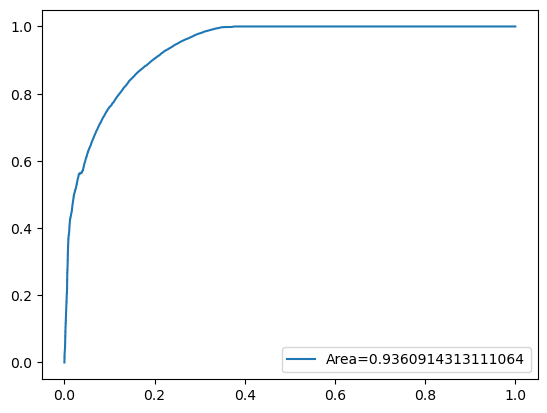

In [189]:
pred_test = modelClf.predict(X_test)        
print("roc_auc_score", metrics.roc_auc_score(y_test, pred_test))

fpr, tpr, _ = metrics.roc_curve(y_test,  y_score[:,-1])
auc = metrics.roc_auc_score(y_test, y_score[:,-1])
plt.plot(fpr,tpr,label="Area="+str(auc))
plt.legend(loc=4)
plt.show()